Imports and data uploads
-----------

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter('ignore')
import os
from scipy import stats
import colorcet as cc
import scipy
%matplotlib inline

In [2]:
# upload data
cpath = os.getcwd() #assumes all files are in the same path as the notebook
mean_df = pd.read_csv(cpath+'/mean_df_female.csv')

# ----------------------------------------------------------------------- 
# ANALYSIS
# -----------------------------------------------------------------------

In [3]:
# plot/colors definitions
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

plt.style.use("seaborn-paper")
phasec = ['#CE3045','#EF7C32','#FFDD00','#939598']
cmap2 = cc.glasbey

In [4]:
# Preapre data for plotting
df_data = mean_df.copy()
data_temp = df_data.groupby(by = ['group','mouse', 'rep','syllable']).mean()['usage'].reset_index()

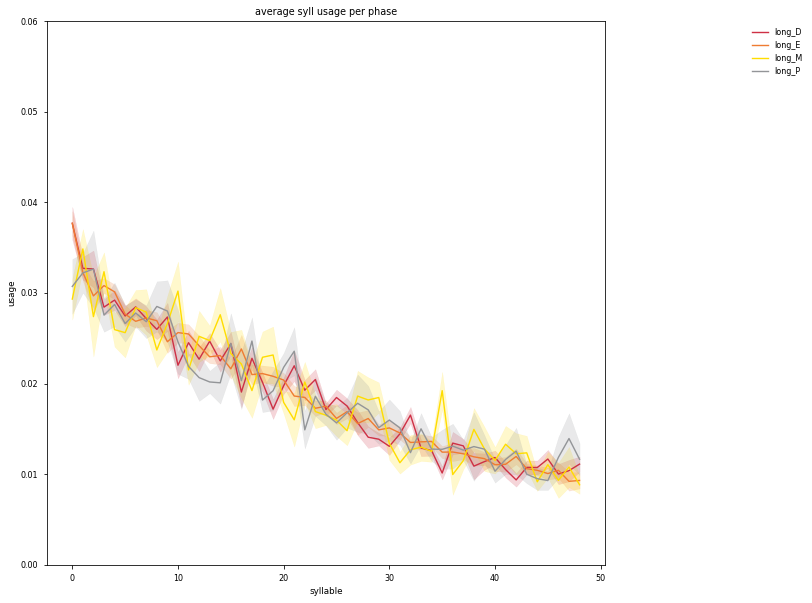

In [5]:
# syllable usage per phase
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax = sns.lineplot(x="syllable",y="usage",data=data_temp, hue='group',palette=phasec, errorbar="se", markers=True)
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1.25, 1))
ax.set_title('average syll usage per phase')
ax.set_ylim([0,0.06])
fig.savefig(data_loc +'syll_usage_per_phase.pdf', bbox_inches='tight')

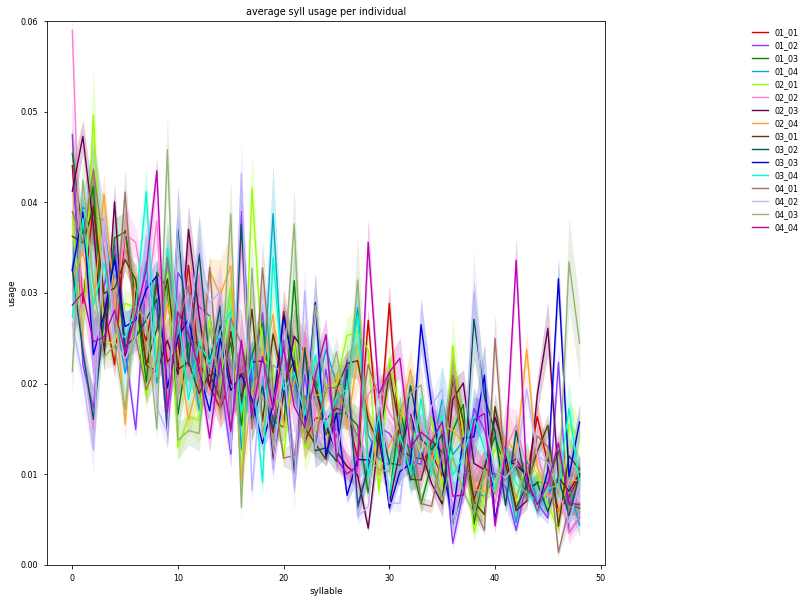

In [6]:
# syllable usage per individual
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax = sns.lineplot(x="syllable",y="usage",data=data_temp, hue='mouse',palette=cmap2, errorbar="se", markers=True)
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1.25, 1))
ax.set_title('average syll usage per individual')
ax.set_ylim([0,0.06])
fig.savefig(data_loc +'syll_usage_per_indv.pdf', bbox_inches='tight')